In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Reading and Cleaning
data=pd.read_csv("winemag-data_first150k.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
#Lots of duplicates
data[data.duplicated("description",keep=False)].sort_values("description").head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
147725,147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
62345,62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,NaN,Chardonnay,La Playa
74993,74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
18803,18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Sonoma,Cabernet Sauvignon,Mauritson
26530,26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,NaN,Sauvignon Blanc,Neumeister


In [7]:
data=data.drop_duplicates("description")
data=data[pd.notnull(data.price)]
data.shape

(89108, 11)

Pearson Correlation: (0.447281396848455, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.460
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                          7.585e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                        0.00
Time:                        17:53:51   Log-Likelihood:                     -4.9789e+05
No. Observations:               89108   AIC:                                  9.958e+05
Df Residuals:                   89107   BIC:                                  9.958e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

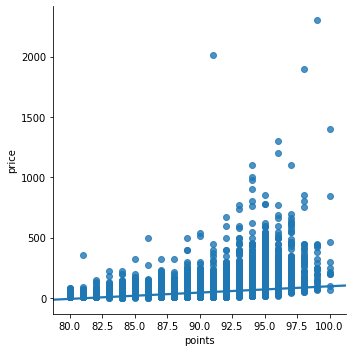

In [9]:
#Exploratory Annalysis
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:",pearsonr(data.price,data.points))
print(sm.OLS(data.points,data.price).fit().summary())
sns.lmplot(y="price",x="points",data=data)

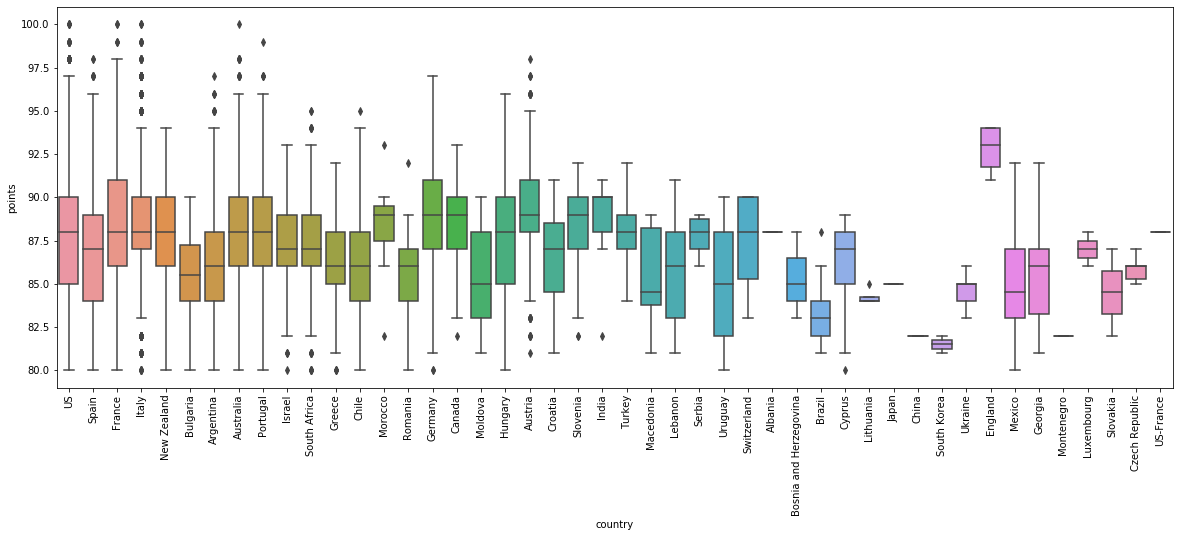

In [10]:
fig,ax=plt.subplots(figsize=(20,7))
chart=sns.boxplot(x="country",y="points",data=data,ax=ax)
plt.xticks(rotation=90)
plt.show()

In [11]:
data.country.value_counts()

US                        40338
Italy                     12152
France                    10184
Spain                      5370
Chile                      3700
Argentina                  3419
Australia                  3098
Portugal                   2726
New Zealand                1744
Austria                    1596
Germany                    1482
South Africa               1464
Greece                      535
Israel                      354
Canada                      148
Hungary                     138
Romania                     106
Croatia                      67
Slovenia                     65
Bulgaria                     56
Mexico                       54
Uruguay                      49
Moldova                      46
Turkey                       45
Georgia                      30
Lebanon                      27
Cyprus                       15
Brazil                       14
Macedonia                    12
Morocco                      11
Serbia                       10
England 

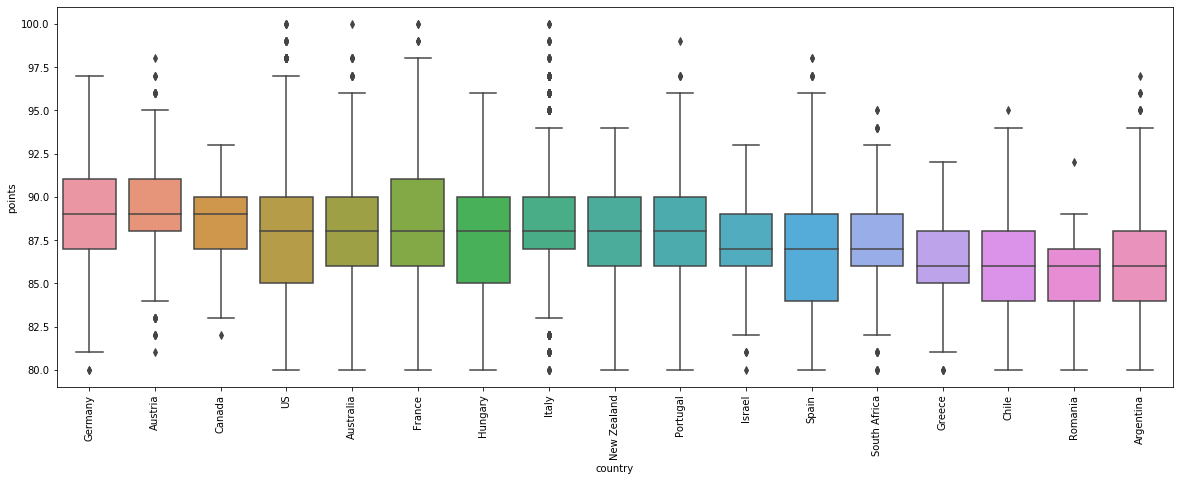

In [12]:
country=data.groupby("country").filter(lambda x:len(x)>100)
df2=pd.DataFrame({col:vals["points"] for col,vals in country.groupby("country")})
meds=df2.median()
meds.sort_values(ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(20,7))
chart=sns.boxplot(x="country",y="points",data=country,order=meds.index,ax=ax)
plt.xticks(rotation=90)
plt.show()

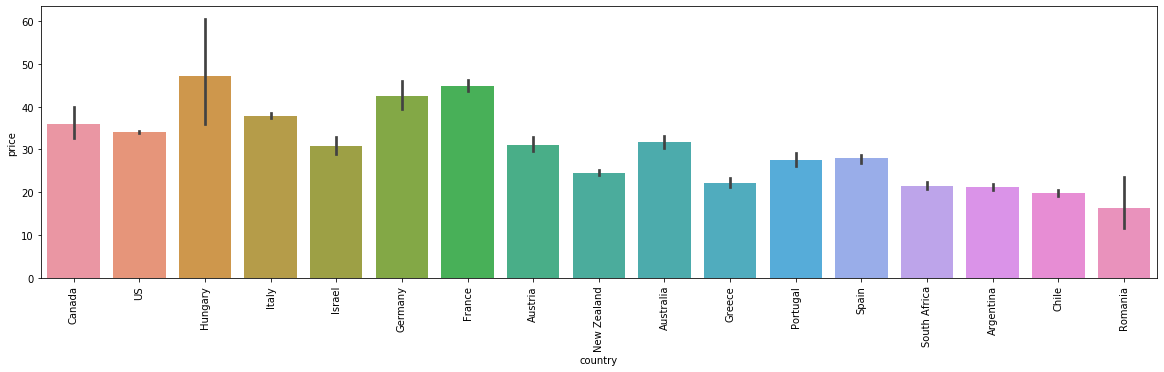

In [15]:
df3=pd.DataFrame({col:vals["price"] for col,vals in country.groupby("country")})
meds2=df3.median()
meds2.sort_values(ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(20,5))
chart=sns.barplot(x="country",y="price",data=country,order=meds2.index,ax=ax)
plt.xticks(rotation=90)
plt.show()

In [16]:
print(meds2)

Canada          30.0
US              28.0
Hungary         27.0
Italy           26.0
Israel          25.0
Germany         25.0
France          25.0
Austria         24.0
New Zealand     20.0
Australia       20.0
Greece          18.0
Portugal        17.0
Spain           17.0
South Africa    17.0
Argentina       15.0
Chile           14.0
Romania         10.0
dtype: float64


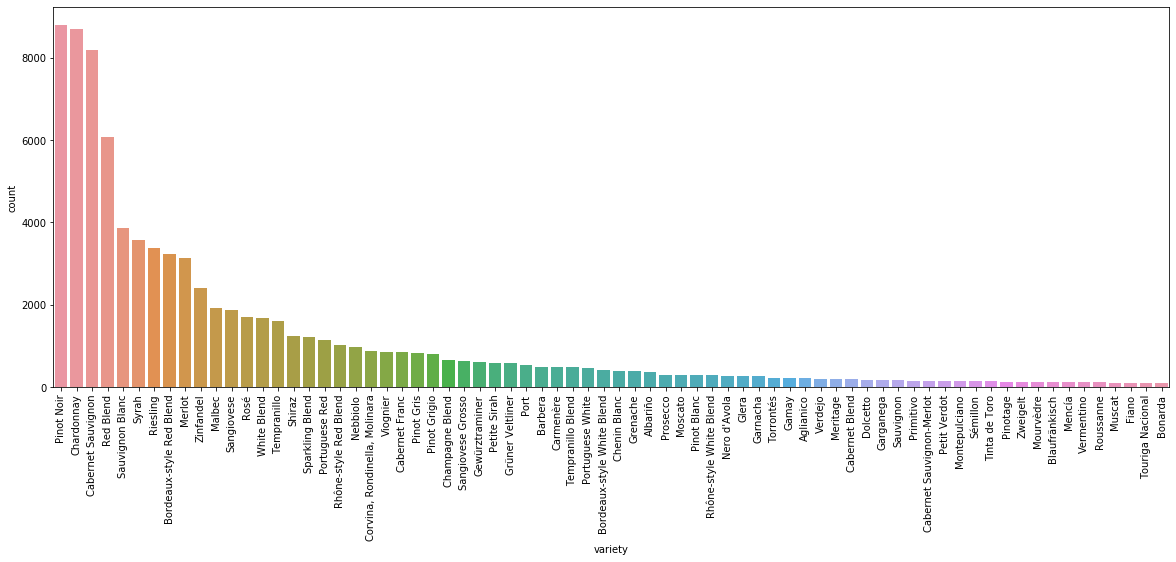

In [17]:
data=data.groupby("variety").filter(lambda x:len(x)>100)
list=data.variety.value_counts().index.tolist()
fig4,ax4=plt.subplots(figsize=(20,7))
sns.countplot(x="variety",data=data,order=list,ax=ax4)
plt.xticks(rotation=90)
plt.show()

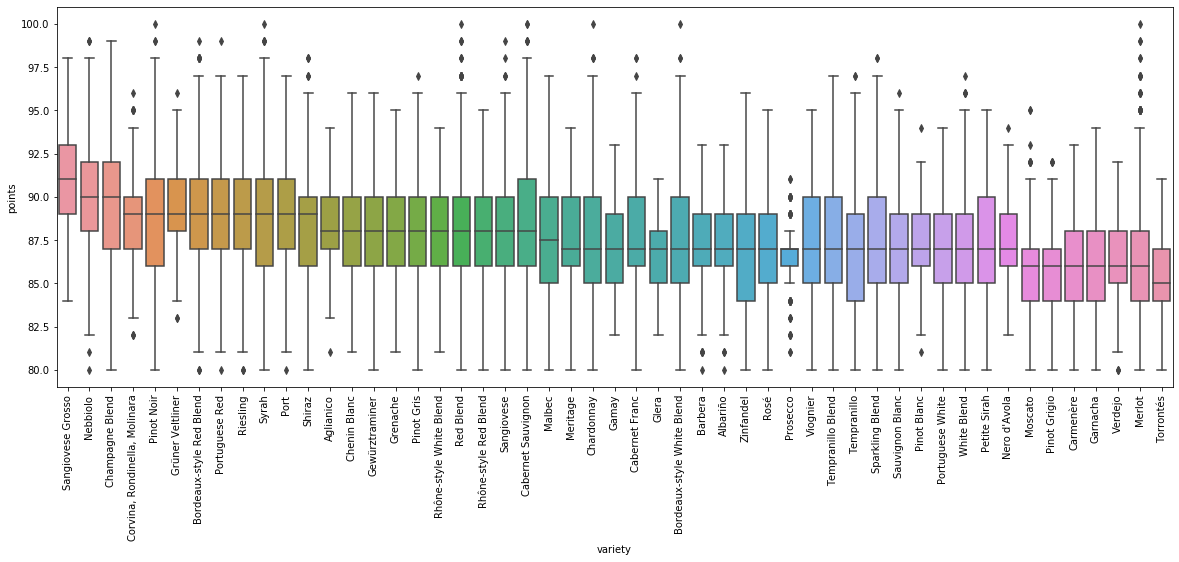

In [19]:
data=data.groupby("variety").filter(lambda x:len(x)>200)
df4=pd.DataFrame({col:vals["points"] for col,vals in data.groupby("variety")})
meds3=df4.median()
meds3.sort_values(ascending=False,inplace=True)

fig3,ax3=plt.subplots(figsize=(20,7))
chart=sns.boxplot(x="variety",y="points",data=data,order=meds3.index,ax=ax3)
plt.xticks(rotation=90)
plt.show()

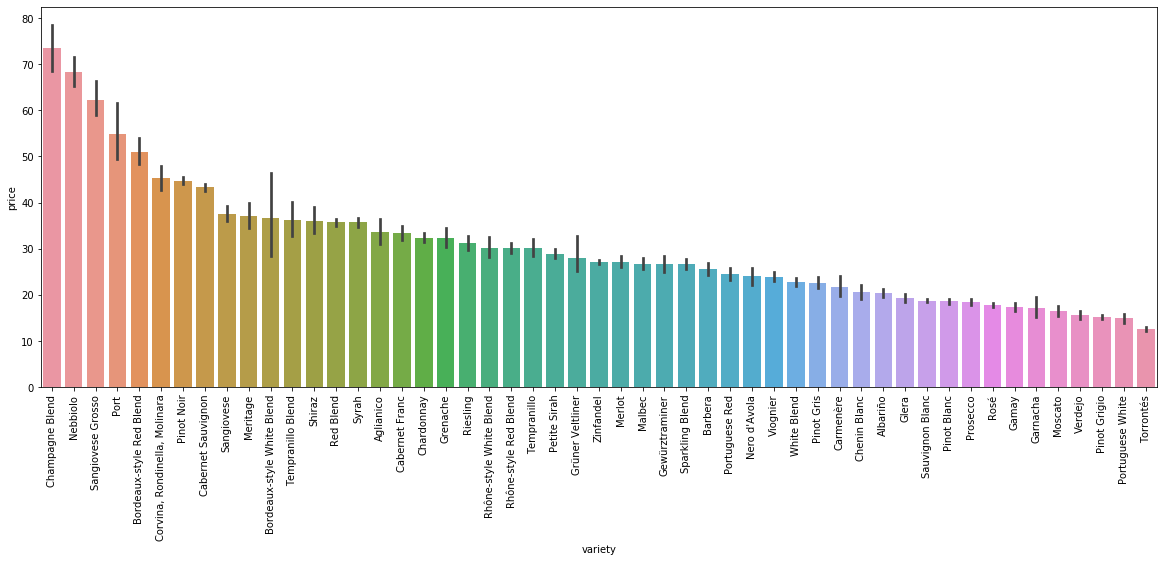

In [21]:
df5=pd.DataFrame({col:vals["price"] for col,vals in data.groupby("variety")})
mean2=df5.mean()
mean2.sort_values(ascending=False,inplace=True)

fig3,ax3=plt.subplots(figsize=(20,7))
chart=sns.barplot(x="variety",y="price",data=data,order=mean2.index,ax=ax3)
plt.xticks(rotation=90)
plt.show()